[Reference](https://towardsdatascience.com/pandas-tricks-for-time-series-analysis-726618532172)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Create a date range of 7 days
pd.date_range("2022-01-01", periods=7, freq='D')

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
# Setting a seed for reproductionability
np.random.seed(12)

# Create dataset
df = pd.DataFrame({
 'date': pd.date_range("2022-01-01", periods=180, freq='D'),
 'sales': np.random.randint(1000, 10000, size=180)}) 

# Set index
df = df.set_index('date')

In [4]:
df.head()

,sales
date,
2022-01-01,6787
2022-01-02,4325
2022-01-03,8409
2022-01-04,4714
2022-01-05,1278


# Resample

In [5]:
# Resample by month end date
df.resample(rule= 'M').mean()

,sales
date,
2022-01-31,5721.000000
2022-02-28,5227.964286
2022-03-31,4333.064516
2022-04-30,5198.400000
2022-05-31,5697.322581
2022-06-30,6574.103448


In [ ]:
# Resample plot
df.resample('W').mean().plot(figsize=(15,5), title='Avg Weekly Sales');

# Shift

In [6]:
# Create a copy of the data
df_shift = df.copy()

#Shift one day up
df_shift['next_day_sales'] = df_shift.sales.shift(-1)

#Shift one week up
df_shift['next_week_sales'] = df_shift.sales.shift(-7)

In [7]:
# Net gain/loss week over week
df_shift['one_week_net'] = df_shift.sales - df_shift.sales.shift(-7)

# Rolling Average

In [8]:
# Calculate 2 days average with Pandas
df.rolling(2).mean()

,sales
date,
2022-01-01,NaN
2022-01-02,5556.0
2022-01-03,6367.0
2022-01-04,6561.5
2022-01-05,2996.0
...,...
2022-06-25,3666.5
2022-06-26,5569.5
2022-06-27,5263.5


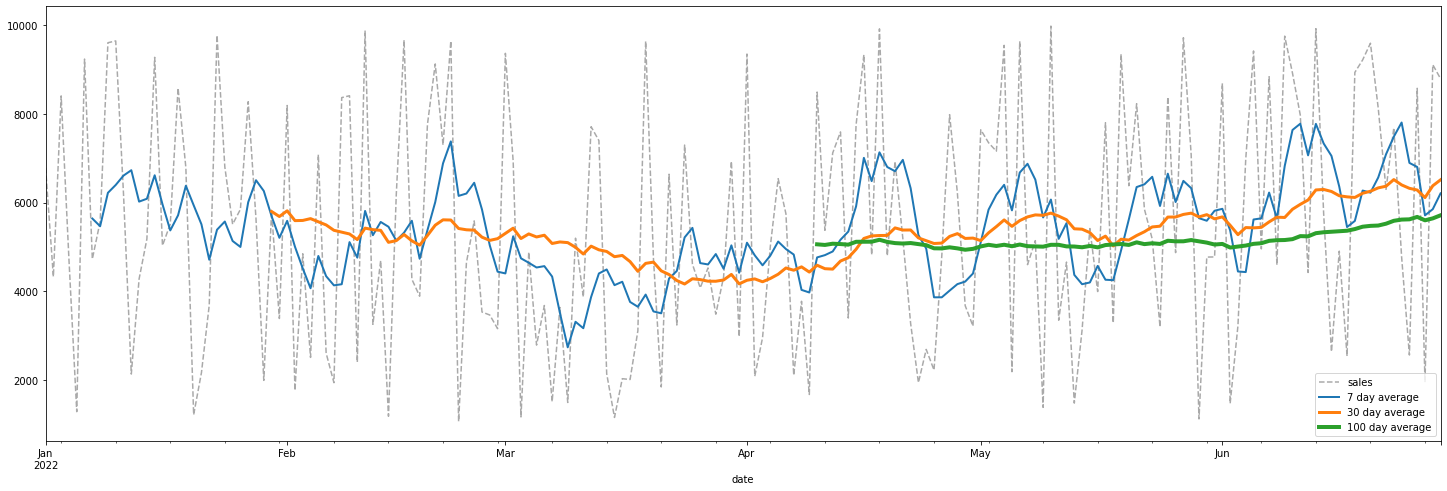

In [9]:
# Rolling plot
df.sales.plot(figsize=(25,8), legend=True, linestyle='--', color='darkgray')

df.rolling(window=7).sales.mean().plot(legend=True, label='7 day average', linewidth=2)

df.rolling(30).sales.mean().plot(legend=True, label='30 day average', linewidth=3)

df.rolling(100).sales.mean().plot(legend=True, label='100 day average', linewidth=4);